In [20]:
from functools import reduce
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


Feature Engineering: 
1. Feature Extraction
    - Text: 
        - bag-of-words
        - bag-of-n-gram
        - Word2vec
            - CBOW 
            - skip-gram 
            - gensim 
    - Image: 
        - pytesseract (tesseract-ocr)
    - Geographical Info
        - reverse_geocoder
    - Time data 
    - Website, blog data 
2. Feature Transformation: Normalize features 
    - Normalize: 
        - StandardScaler
    - Scaling: 
        - MinMaxScaler 
        - UnitLength
        - RobustScaler
3. Feature Seleciton:
    - Using statistics: 
        - VarianceThreshold: keep features with variance > threshold 
        - SelectKBest, f_classif: Fisher’s Linear Discriminant
    - Using model: 
        - SelectFromModel
    - Using Search
        - Exhaustive Search 
        - SequentialFeatureSelector

### 1. Feature Extraction 

### 1.1. Text
1.1.1. bag-of-words (for text extraction)

In [3]:
texts = [['i', 'have', 'a', 'cat'], 
        ['he', 'has', 'a', 'dog'], 
        ['he', 'has', 'a', 'dog', 'and', 'i', 'have', 'a', 'cat']]

In [4]:
dict = list(enumerate(set(reduce(lambda x, y: x + y, texts)))) # function, iterate 

def bag_of_word(sentence):
    vector = np.zeros(len(dict))

    for i, word in dict: 
        count = 0 
        for w in sentence: 
            if w == word: 
                count += 1 
        vector[i] = count
    return vector

for s in texts: 
    v = bag_of_word(s)
    print(v)

[1. 0. 1. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 2.]


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ['i have a cat', 
        'he has a dog', 
        'he has a dog and i have a cat']

vect = CountVectorizer()
X = vect.fit_transform(texts) # Compressed Sparse Row matrix
print(vect.get_feature_names_out())
print(X.toarray())

['and' 'cat' 'dog' 'has' 'have' 'he']
[[0 1 0 0 1 0]
 [0 0 1 1 0 1]
 [1 1 1 1 1 1]]


This method have drawback: it does not care to the order of words in setence. As a consequence, 2 sentences with different meanings with have the same vector as the following example: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range = (1, 1)) # 1, 1: 
vect.fit_transform(['you have no dog', 'no, you have dog']).toarray()

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

### 1.1.2. bag-of-n-gram
- n-gram: is a string of n tokens
- n =1: unigram
- n = 2: bigram 
- n = 3: trigram 

ngram_range = (nMin for n-gram, nMax for n-gram).

In [14]:
bigram = CountVectorizer(ngram_range = (2, 2))
n1, n2, n3 = bigram.fit_transform(['you have no dog', 'no, you have dog', 'you have a dog']).toarray()
print(bigram.get_feature_names_out())
n1, n2, n3

['have dog' 'have no' 'no dog' 'no you' 'you have']


(array([0, 1, 1, 0, 1]), array([1, 0, 0, 1, 1]), array([1, 0, 0, 0, 1]))

In [15]:
trigram = CountVectorizer(ngram_range = (3, 3))
n1, n2, n3 = trigram.fit_transform(['you have no dog', 'no, you have dog', 'you have a dog']).toarray()
print(trigram.get_feature_names_out())
n1, n2, n3

['have no dog' 'no you have' 'you have dog' 'you have no']


(array([1, 0, 0, 1]), array([0, 1, 1, 0]), array([0, 0, 1, 0]))

We can calulate the Euclidean distance between vectors 

In [16]:
from scipy.spatial.distance import euclidean
print(euclidean(n1, n2), euclidean(n2, n3), euclidean(n1, n3))

2.0 1.0 1.7320508075688772


### 1.1.3.  TF-IDF
(Term Frequency – Inverse Document Frequency)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
 	"This movie was amazing!",
    "I hated the ending of the film",
    "The actors were fantastic",
    "The plot was boring and predictable"
]

# token_pattern: default chỉ lấy những từ có ít nhất 2 ký tự trở nên: I -> loại 
# Tính tfidf cho mỗi từ. max_df để loại bỏ stopwords xuất hiện ở hơn 90% các câu 
# -> những từ xuất hiện ở 90% văn bản thì là từ stopword -> ko có ý nghĩa phân loại nhiều 
vect = TfidfVectorizer(max_df=.9)
X = vect.fit_transform(corpus)
print(vect.get_feature_names_out())
print(X.shape)
# print(vect.idf_)
# print(vect.get_stop_words())
# print("Vocabulary:", vect.vocabulary_)


['actors' 'amazing' 'and' 'boring' 'ending' 'fantastic' 'film' 'hated'
 'movie' 'of' 'plot' 'predictable' 'the' 'this' 'was' 'were']
(4, 16)


### 1.1.4 Word2vec

### 1.2. Image 

ORC: Optical character recognition

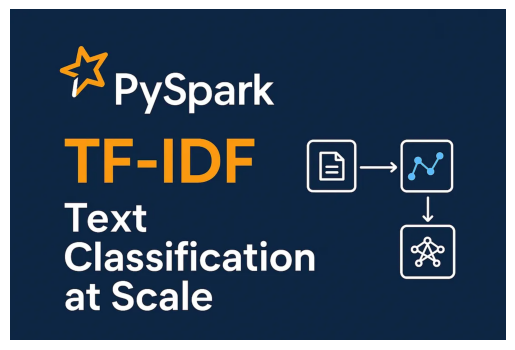

In [ ]:
from io import BytesIO
import requests
from PIL import Image


url = "https://miro.medium.com/v2/resize:fit:1100/format:webp/1*BObuF_1jrvv6RBMYwHrfdw.png"
img = requests.get(url)

img = Image.open(BytesIO(img.content))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#!pip install pytesseract # need to install tesseract-ocr at local machine: pytesseract → call tesseract.exe →  return OCR
#!pip install opencv-python

import pytesseract
import cv2

# img_rgb = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB) # Chuyển BGR → RGB để OCR đúng
# plt.imshow(img_rgb)
print(pytesseract.image_to_string(img))


vA PySpark
TF-IDF +

Text

Classification
at Scale



### 1.3 Geographical Info
reverse_geocoder

In [19]:
import reverse_geocoder as revgc 

#latitude, longitude
revgc.search((21.0364466, 105.8450788))

Loading formatted geocoded file...


[{'lat': '21.02857',
  'lon': '105.85064',
  'name': 'Hoan Kiem',
  'admin1': 'Ha Noi',
  'admin2': '',
  'cc': 'VN'}]

### 1.4 Time Data

In [30]:
from datetime import datetime

dataset = pd.DataFrame({'created': ['2021-08-13 00:00:00', '2021-08-12 00:00:00', '2021-08-11 00:00:00', 
                                    '2021-08-10 00:00:00', '2021-08-09 00:00:00', '2021-08-08 00:00:00', '2021-08-07 00:00:00']})

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S') 
# strptime: string-parse-time: str to time 
# strftime: time-to-str ex: datetime.now().strftime("%Y-%m-%d %H:%M:%S")

dataset['created'] = dataset['created'].map(lambda x: parser(x))
print(dataset['created'].dtypes) # need type datetime for applying datetime funciton 

dataset['weekday'] = dataset['created'].apply(lambda x: x.date().weekday())
dataset['is_weekend'] = dataset['created'].apply(lambda x: 1 if x.date().weekday() in [5,6] else 0)
dataset.head()

datetime64[ns]


,created,weekday,is_weekend
0,2021-08-13,4,0
1,2021-08-12,3,0
2,2021-08-11,2,0
3,2021-08-10,1,0
4,2021-08-09,0,0


### 1.5 Website, blog 

!pip install user_agents


In [32]:
import user_agents 

# Giả định có một user agent như bên dưới
ua = "Mozilla/5.0 (iPhone; CPU iPhone OS 13_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0 Mobile/15E148 Safari/604.1"

# Parser thông tin user agent
ua = user_agents.parse(ua)

# Khai thác các thuộc tính của user
print('Is a bot? ', ua.is_bot)
print('Is mobile? ', ua.is_mobile)
print('Is PC? ',ua.is_pc)
print('OS Family: ',ua.os.family)
print('OS Version: ',ua.os.version)
print('Browser Family: ',ua.browser.family)
print('Browser Version: ',ua.browser.version)

Is a bot?  False
Is mobile?  True
Is PC?  False
OS Family:  iOS
OS Version:  (13, 2)
Browser Family:  Mobile Safari
Browser Version:  (13, 0)


### 3. Feature Seleciton

3.1 Using Statistics:

3.1.1. VarianceThreshold: keep features with variance > threshold

In [45]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


X, y = make_classification(n_samples=500, n_features=50, random_state=42)
print(X.shape, y.shape)

(500, 50) (500,)


In [ ]:
# Only keep features with variance >= 0.9 (threshold = 0.9)
X_kvar = VarianceThreshold(0.9).fit_transform(X)

3.1.2 SelectKBest: 

select K best features based on statistical score_func = [chi2, f_classif, ...] ~ [chi-squared, f-statistic, ...]

**Notes**: chi2 only with X >= 0 (ex: bag-of-words, tf-idf)

In [43]:
X_selectkbest = SelectKBest(score_func=f_classif, k=5).fit_transform(X, y)

### Evaluate the model using Logistic Regression on different training sets

In [ ]:
logit = LogisticRegression(solver='lbfgs', random_state=42)

acc_origin = cross_val_score(logit, X=X, y=y, scoring='accuracy', cv=5, n_jobs=-1)
acc_threshold = cross_val_score(logit, X=X_kvar, y=y, scoring='accuracy', cv=5, n_jobs=-1)
acc_kbest = cross_val_score(logit, X=X_selectkbest, y=y, scoring='accuracy', cv=5, n_jobs=-1)

print(f"Original Accuracy: {acc_origin.mean(): .3f}")
print(f"Variance Threshold Accuracy: {acc_threshold.mean(): .3f}")
print(f"SelectKBest Accuracy: {acc_kbest.mean(): .3f}")


Original Accuracy:  0.850
Variance Threshold Accuracy:  0.856
SelectKBest Accuracy:  0.878


### 3.2 Evaluate models to choose the best 

3.2.1. SelectFromModel 

In [47]:
from sklearn.calibration import LinearSVC # faster than SVC with large dataset 
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel # select best features based on the output of a model 
from sklearn.pipeline import make_pipeline


rdf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = LinearSVC(C=0.01, penalty='l1', dual=False) 
# C: parameter for regularization, 
# dual: (default) 
# - True(n_samples < n_features), (spare matrix) -> số biến là số samples (chọn số biến ít hơn -> giải nhanh hơn)
# - False (n_samples > n_features) ->  số biến là số features


# Tạo một pipeline thực hiện 3 bước: StandardScaler -> select feature_importances_ from RandomForestClassifier -> fit to logit 
ppl_rdf = make_pipeline(StandardScaler(), SelectFromModel(estimator=rdf), logit)
ppl_svc = make_pipeline(StandardScaler(), SelectFromModel(estimator=svc), logit) # select important features base on abs(.coef_) 


In [50]:
acc_logit = cross_val_score(logit, X=X, y=y, scoring='accuracy', cv=5).mean()
acc_rdf = cross_val_score(rdf, X=X, y=y, scoring='accuracy', cv=5).mean()
acc_ppl_rdf = cross_val_score(ppl_rdf, X=X, y=y, scoring='accuracy', cv=5).mean()
acc_ppl_svc = cross_val_score(ppl_svc, X=X, y=y, scoring='accuracy', cv=5).mean()

In [53]:
print(f"Original Accuracy: {acc_logit:.2f}")
print(f"RandomForestClassifier Accuracy: {acc_rdf:.2f}")
print(f"Features from RandomForestClassifier Accuracy: {acc_ppl_rdf:.2f}")
print(f"Features from SVC Accuracy: {acc_ppl_svc:.2f}")

Original Accuracy: 0.85
RandomForestClassifier Accuracy: 0.92
Features from RandomForestClassifier Accuracy: 0.88
Features from SVC Accuracy: 0.88


3.3. Using Search:  

3.3.1. Exhaustive Search 

3.3.2. SequentialFeatureSelector

In [59]:
from sklearn.feature_selection import SequentialFeatureSelector

# forward:  k =1, 2, ... => to select the best k 
# backward: k = N, N-1, ... => to select the best k 
selector = SequentialFeatureSelector(logit, scoring='accuracy', n_features_to_select  = 3, direction='forward', n_jobs=-1)
selector.fit(X, y)

,estimator,LogisticRegre...ndom_state=42)
,n_features_to_select,3
,tol,None
,direction,'forward'
,scoring,'accuracy'
,cv,5
,n_jobs,-1
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [62]:
X

array([[ 0.22181115,  0.35782106,  1.13622744, ..., -0.31336863,
         0.47491987, -0.17047615],
       [ 0.2806364 , -1.13768567, -1.34470489, ..., -0.20149153,
        -0.60670029, -0.49190245],
       [-0.36146277,  1.59058207, -0.12571053, ...,  0.67893129,
         1.58983898, -1.34212775],
       ...,
       [ 0.48022926,  1.93946355, -0.05329049, ...,  0.78990775,
        -0.27360656, -0.00606183],
       [ 0.36384043,  1.9248455 ,  0.14815098, ...,  0.0471047 ,
         0.04364364, -1.03849934],
       [-0.4449702 ,  0.74563583,  1.17988123, ...,  0.15497202,
         0.05843869,  1.76624241]], shape=(500, 50))

In [66]:
idx = selector.get_support(indices=True)
print(idx) # selected_features column index 

[20 29 32]
